# EDA-IMDB Top 1000 movies IMDB

This notebook is firstly made based on the work of Edumis Viera, it is a ETA (Exploratory Data Analysis) about the Top 1000 IMDB movies.

First, we load the packages.

In [2]:
import pandas as pd # for lineal algebra
import numpy as np  # for data proccesing, CSV file

In [ ]:
import matplotlib.pyplot as plt # typical package to visualize functions
# magic command used to get the plots in the notebook
%matplotlib inline              
import seaborn as sns           # typical package to visualize functions
import plotly.express as px     # tool for creating interactive and 
                                # visually appealing charts
from pathlib import Path

In [ ]:
df = Path("../datasets/imdb_top_1000.csv")
df.head() # we read the csv and show top 5 movies

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


There are 1000 x 16 columns to be analyzed $\downarrow$

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [6]:
df.isnull().any()


Poster_Link      False
Series_Title     False
Released_Year    False
Certificate       True
Runtime          False
Genre            False
IMDB_Rating      False
Overview         False
Meta_score        True
Director         False
Star1            False
Star2            False
Star3            False
Star4            False
No_of_Votes      False
Gross             True
dtype: bool

Some of the Meta_score are null, lets see.

In [43]:
df[df['Meta_score'].isnull()].head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
20,https://m.media-amazon.com/images/M/MV5BOTc2ZT...,Soorarai Pottru,2020,U,153 min,Drama,8.6,"Nedumaaran Rajangam ""Maara"" sets out to make t...",NaN,Sudha Kongara,Suriya,Madhavan,Paresh Rawal,Aparna Balamurali,54995,NaN
54,https://m.media-amazon.com/images/M/MV5BNWJhMD...,Ayla: The Daughter of War,2017,NaN,125 min,"Biography, Drama, History",8.4,"In 1950, amid-st the ravages of the Korean War...",NaN,Can Ulkay,Erdem Can,Çetin Tekindor,Ismail Hacioglu,Kyung-jin Lee,34112,NaN
55,https://m.media-amazon.com/images/M/MV5BY2FiMT...,Vikram Vedha,2017,UA,147 min,"Action, Crime, Drama",8.4,"Vikram, a no-nonsense police officer, accompan...",NaN,Gayatri,Pushkar,Madhavan,Vijay Sethupathi,Shraddha Srinath,28401,NaN
57,https://m.media-amazon.com/images/M/MV5BMTQ4Mz...,Dangal,2016,U,161 min,"Action, Biography, Drama",8.4,Former wrestler Mahavir Singh Phogat and his t...,NaN,Nitesh Tiwari,Aamir Khan,Sakshi Tanwar,Fatima Sana Shaikh,Sanya Malhotra,156479,"12,391,761"
65,https://m.media-amazon.com/images/M/MV5BMDhjZW...,Taare Zameen Par,2007,U,165 min,"Drama, Family",8.4,An eight-year-old boy is thought to be a lazy ...,NaN,Aamir Khan,Amole Gupte,Darsheel Safary,Aamir Khan,Tisca Chopra,168895,"1,223,869"


So, there are missing values in the next columns: Certificate, Meta_score & Gross; lets visualize the missing values (null, or NaN values) in a DataFrame using a heatmap to quickly identify which columns and which rows have missing data. 

<function matplotlib.pyplot.show(close=None, block=None)>

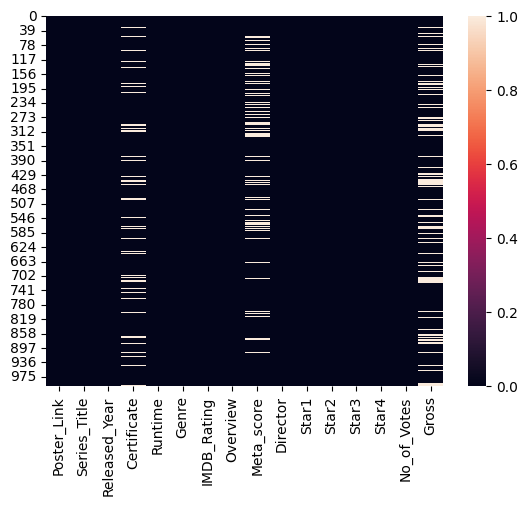

In [44]:
sns.heatmap(df.isnull())
plt.show

As we see, there are a lot of missing values in the Gross column, so we are going to drop the rows with this missing value for an analysis of the gross

In [45]:
df.dropna(subset=['Gross'], inplace=True)
df.shape # so now we lost 169 rows (movies)
         # $$$ check if this is the only way

(831, 16)

After that, we also know that in the column "Certificate" and "Meta_Score" are null values, so we are going to use the **Mode** to fill in missing values:

In [46]:
df['Certificate'] = df['Certificate'].fillna(df["Certificate"].mode()[0])
df['Meta_score'] = df['Meta_score'].fillna(df["Meta_score"].mode()[0])
df.shape # to confirm the size of the df after handling missing values

(831, 16)

This next line provides a summary of the number of missing values in each column. 

In [47]:
df.isnull().sum()
# isnull returns a DF of the same shape as df where each cell is True or False
# True are treated as 1 and false as 0, so it gives the number of NaN for each column

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

Now we are going to extract all the unique values from the Runtime column. (To see the distinct values present in the column) which is useful when is a categorical or discrete data.

In [48]:
df['Runtime'].unique()

array(['142 min', '175 min', '152 min', '202 min', '96 min', '201 min',
       '154 min', '195 min', '148 min', '139 min', '178 min', '161 min',
       '179 min', '136 min', '146 min', '124 min', '133 min', '132 min',
       '169 min', '130 min', '125 min', '189 min', '116 min', '127 min',
       '118 min', '121 min', '207 min', '122 min', '106 min', '112 min',
       '151 min', '150 min', '155 min', '119 min', '110 min', '88 min',
       '137 min', '165 min', '109 min', '102 min', '87 min', '126 min',
       '117 min', '181 min', '149 min', '105 min', '164 min', '170 min',
       '98 min', '101 min', '113 min', '134 min', '229 min', '115 min',
       '147 min', '95 min', '123 min', '131 min', '153 min', '108 min',
       '104 min', '89 min', '81 min', '99 min', '160 min', '114 min',
       '129 min', '228 min', '128 min', '103 min', '143 min', '107 min',
       '68 min', '138 min', '167 min', '163 min', '186 min', '135 min',
       '140 min', '180 min', '158 min', '210 min', '156 min'

Cleaning and transforming data, we want to remove characters like 'min' and commas and conver the columns to integers.

In [49]:
df['Runtime'] = df['Runtime'].str.replace(' min', '')
df['Gross'] = df['Gross'].str.replace(',', '')

# Conver the column to integer
df['Runtime'] = df['Runtime'].astype(int)
df['Gross'] = df['Gross'].astype(int) 

Because we removed the indicators, rename the columns:

In [50]:
df = df.rename(columns={
    'Runtime': 'Runtime (min)',
    'Gross': 'Gross (USD)'
})
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime (min),Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross (USD)
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,https://m.media-amazon.com/images/M/MV5BYjRmY2...,Giù la testa,1971,PG,157,"Drama, War, Western",7.6,A low-life bandit and an I.R.A. explosives exp...,77.0,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,696690
991,https://m.media-amazon.com/images/M/MV5BMzAyND...,Kelly's Heroes,1970,GP,144,"Adventure, Comedy, War",7.6,A group of U.S. soldiers sneaks across enemy l...,50.0,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,1378435
992,https://m.media-amazon.com/images/M/MV5BMjAwMT...,The Jungle Book,1967,U,78,"Animation, Adventure, Family",7.6,Bagheera the Panther and Baloo the Bear have a...,65.0,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,141843612
994,https://m.media-amazon.com/images/M/MV5BZjQyMG...,A Hard Day's Night,1964,U,87,"Comedy, Music, Musical",7.6,"Over two ""typical"" days in the life of The Bea...",96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,13780024


Currently we have a (831, 16) dataset. Now we are going to remove the movies tagged with PG(Paternal Guide) using a boolean mask.

In [51]:
df = df.drop(df[df['Released_Year'] == 'PG'].index) # the .index is used like that because
                                                    # drop() needs the indexes of the rows 
                                                    # to remove
df.shape

(830, 16)

In [52]:
df.info

<bound method DataFrame.info of                                            Poster_Link  \
0    https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1    https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2    https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3    https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4    https://m.media-amazon.com/images/M/MV5BMWU4N2...   
..                                                 ...   
990  https://m.media-amazon.com/images/M/MV5BYjRmY2...   
991  https://m.media-amazon.com/images/M/MV5BMzAyND...   
992  https://m.media-amazon.com/images/M/MV5BMjAwMT...   
994  https://m.media-amazon.com/images/M/MV5BZjQyMG...   
997  https://m.media-amazon.com/images/M/MV5BM2U3Yz...   

                 Series_Title Released_Year Certificate  Runtime (min)  \
0    The Shawshank Redemption          1994           A            142   
1               The Godfather          1972           A            175   
2             The Dark Knight          2008      

$\uparrow$ one movie removed

Also we dont need the columns with Overview or Poster_Link

In [53]:
df = df.drop(['Overview', 'Poster_Link'], axis=1)
df

,Series_Title,Released_Year,Certificate,Runtime (min),Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross (USD)
0,The Shawshank Redemption,1994,A,142,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,Giù la testa,1971,PG,157,"Drama, War, Western",7.6,77.0,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,696690
991,Kelly's Heroes,1970,GP,144,"Adventure, Comedy, War",7.6,50.0,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,1378435
992,The Jungle Book,1967,U,78,"Animation, Adventure, Family",7.6,65.0,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,141843612
994,A Hard Day's Night,1964,U,87,"Comedy, Music, Musical",7.6,96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,13780024


Lets make a Correlation matrix which is a table that shows the **correlation coefficients** betweeen pairs of variables in a dataset. It is used to understand the relationships between variables.

Where
- -1 its a perfect negative correlationship
- 1 its a perfect positive correlationship
- 0 means no correlationship

```Python
numeric_features: is a new DataFrame that contains only the specified   columns
correlation_matrix: calcules the matrix for the DataFrame
sns.heatmap: creates a heatmap with maps ranges of -1 to 1
```

Text(0.5, 1.0, 'Correlation Matrix')

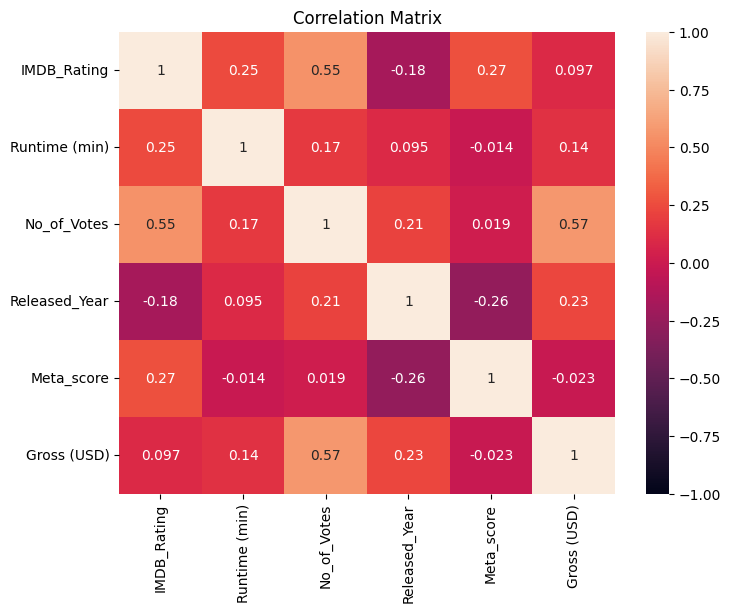

In [66]:
fig, ax = plt.subplots(figsize = (8, 6))
# correlation matrix
numeric_features = df[['IMDB_Rating', 'Runtime (min)','No_of_Votes',
                        'Released_Year', 'Meta_score', 'Gross (USD)']]
correlation_matrix = numeric_features.corr()
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1)
ax.set_title('Correlation Matrix')

So, inspired by this lets see which features were determinant to be high-grossed, first selecting a "filtered DataFrame" to not saturate the graphic and see if the IMDB Meta_score is important or not to say if a movie made money,

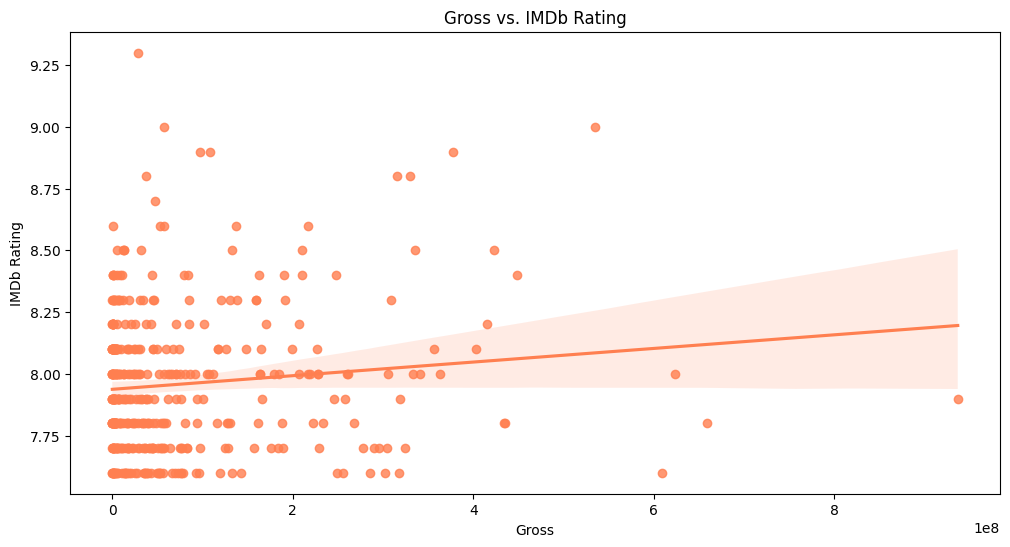

In [74]:
filtered_df = df.sample(frac= .5, random_state=42)

plt.figure(figsize=(12,6))
sns.regplot(x=filtered_df['Gross (USD)'], y=filtered_df['IMDB_Rating'], color='coral')
plt.title('Gross vs. IMDb Rating')
plt.xlabel('Gross')
plt.ylabel('IMDb Rating')
plt.show()

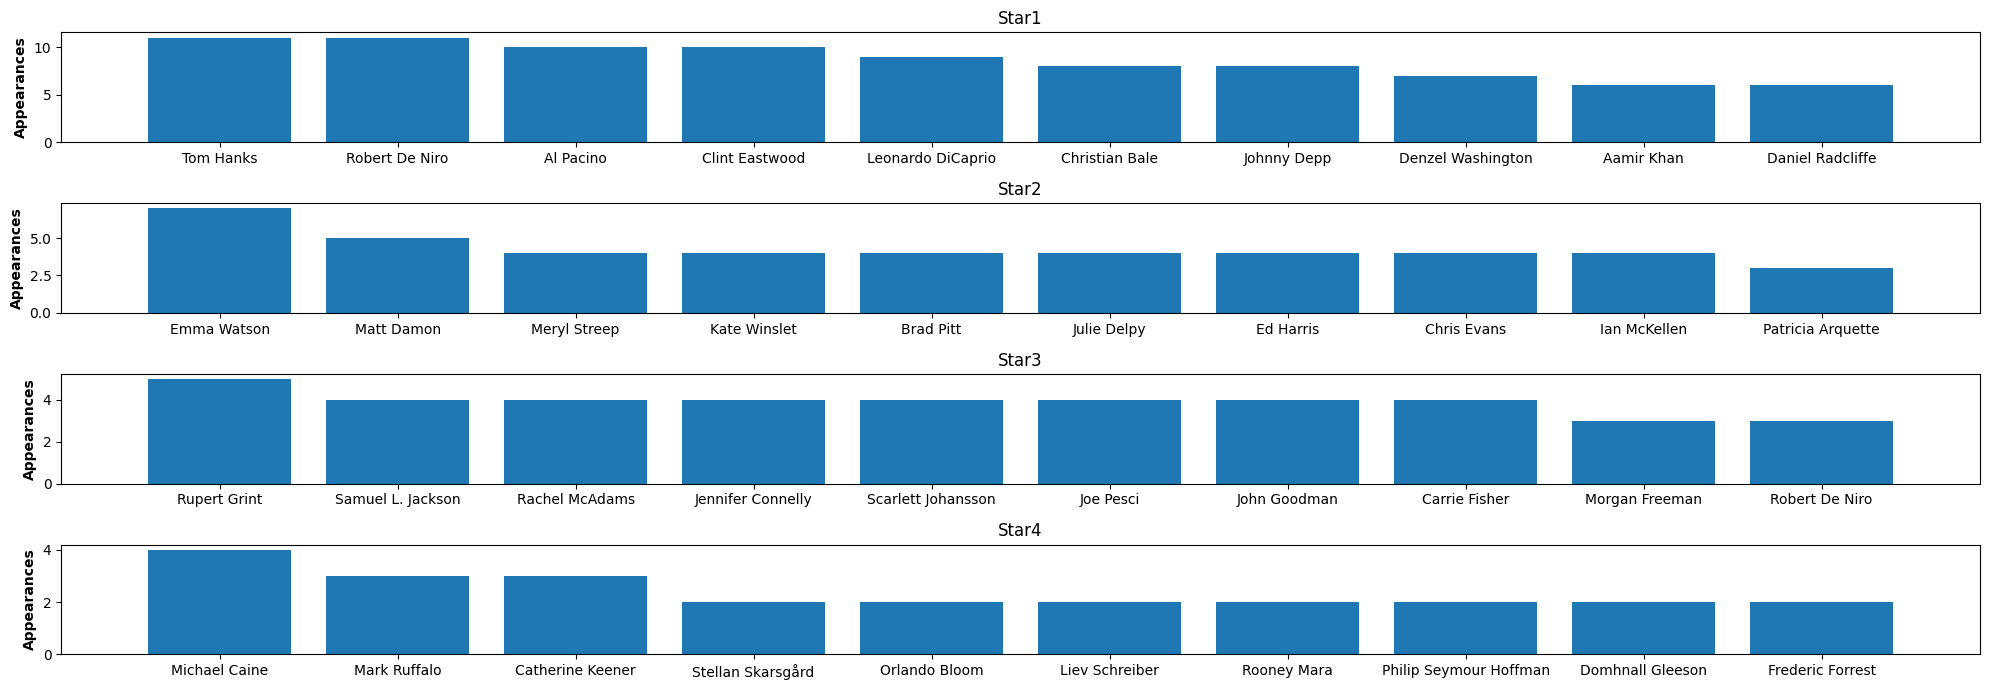

In [75]:
stars=['Star1','Star2','Star3','Star4']
fig,axs=plt.subplots(4,1,figsize=(20,7))
ax=0
for x in stars:
    axs[ax].bar(df[x].value_counts()[:10].index,df[x].value_counts()[:10])
    axs[ax].set_title(x)
    axs[ax].set_ylabel("Appearances", weight = "bold")
    ax+=1
    plt.tight_layout()